<a href="https://colab.research.google.com/github/bimajr/posttest2_DM/blob/main/075_Arya_Bhima_Andika_PT2_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/bimajr/posttest2_DM/main/posttest2.csv")

In [ ]:
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Pada dasarnya, df.sum() adalah metode yang digunakan pada suatu objek pandas DataFrame untuk menghitung total dari semua nilai dalam DataFrame tersebut.
df.sum()

whole milk             5
pasrty                 1
salty snack            2
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [ ]:
# Menampilkan item
df.columns

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [ ]:
# 2 Item set
from itertools import permutations
# 
# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [ ]:
# Filter yang ada isinya aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('salty snack', 'root vegetables'),
 ('salty snack', 'detergent'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hy

In [ ]:
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('salty snack', 'root vegetables')": 1,
 "('salty snack', 'detergent')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('s

In [ ]:
len(df)

19

In [ ]:
# List support
# supp = [i/len(df)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

---
('whole milk', 'pasrty') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pasrty', 'whole milk') support = 5.263157894736842%
('pasrty', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pasrty') support = 5.263157894736842%
('salty snack', 'root vegetables') support = 5.263157894736842%
('salty snack', 'detergent') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene artic

In [ ]:
# List Confidens
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

---
whole milk->pasrty  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pasrty->whole milk  Confidence = 100.0%
pasrty->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 50.0%
salty snack->pasrty  Confidence = 50.0%
salty snack->root vegetables  Confidence = 50.0%
salty snack->detergent  Confidence = 50.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yog

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

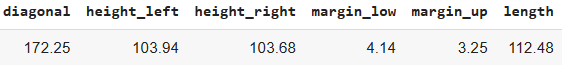
<!-- 1412 -->

In [ ]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

In [ ]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

###Collect and Describe Data

In [4]:
df2 = pd.read_csv("https://raw.githubusercontent.com/bimajr/posttest2_DM/main/deteksi_uang_palsu.csv")
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


### 1. Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

In [6]:
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal'    : [172.25],
                         'height_left' : [103.94],
                         'height_right': [103.68],
                         'margin_low'  : [4.14],
                         'margin_up'   : [3.25],
                         'length'      : [112.48]})

# menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
distances = []
for i in range(len(df2)):
    row = df2.iloc[i]
    distance = np.sqrt((row['diagonal'] - new_data['diagonal']) ** 2 +
                       (row['height_left'] - new_data['height_left']) ** 2 +
                       (row['height_right'] - new_data['height_right']) ** 2 +
                       (row['margin_low'] - new_data['margin_low']) ** 2 +
                       (row['margin_up'] - new_data['margin_up']) ** 2 +
                       (row['length'] - new_data['length']) ** 2)
    distances.append(distance)

# Menambahkan kolom distance ke dataframe utama
df2['distance'] = distances

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])

Tabel Jarak : 
0    0    0.671267
dtype: float64
1    0    1.458321
dtype: float64
2    0    0.834626
dtype: float64
3    0    0.910934
dtype: float64
4    0    1.312593
dtype: float64
5    0    2.421281
dtype: float64
6    0    1.741896
dtype: float64
7    0    1.113463
dtype: float64
8    0    1.722034
dtype: float64
9    0    1.738217
dtype: float64
Name: distance, dtype: object


### 1.1 Menambahkan Kolom Jarak

In [7]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,distance
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0 0.671267 dtype: float64
1,True,171.66,103.68,103.41,4.35,3.33,113.74,0 1.458321 dtype: float64
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0 0.834626 dtype: float64
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0 0.910934 dtype: float64
4,True,171.79,104.57,104.04,4.26,3.15,113.46,0 1.312593 dtype: float64
5,False,172.00,104.23,104.52,5.76,3.37,110.94,0 2.421281 dtype: float64
6,False,171.56,104.03,103.93,5.47,3.50,111.67,0 1.741896 dtype: float64
7,False,171.90,104.33,104.40,4.70,3.31,112.12,0 1.113463 dtype: float64
8,False,171.84,104.06,104.10,4.87,3.25,111.04,0 1.722034 dtype: float64
9,False,172.11,104.14,104.15,4.84,3.28,110.98,0 1.738217 dtype: float64


### 2. Mengurutkan data berdasarkan K jarak terdekat (dengan k = akar 2 dari banyak data)

In [ ]:
# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - 172.25)**2
    + (df2['height_left'] - 103.94)**2
    + (df2['height_right'] - 103.68)**2
    + (df2['margin_low'] - 4.14)**2
    + (df2['margin_up'] - 3.25)**2
    + (df2['length'] - 112.48)**2
)

# Mengurutkan data dari kecil ke besar dan menentukan data terdekat
k = int(np.sqrt(len(df2)))
data_terdekat = df2.sort_values('distance').head(k)

# Menampilkan data terdekat
print(data_terdekat)


### 3.  Menentukan hasil prediksi berdasarkan label terbanyak

In [ ]:
# Mengimpor library sklearn untuk menggunakan algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)

print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True ")
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

# (3) Analisis

> Nama : Arya Bhima Andika

> Nim : 2109116075


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

#Analisis

### Bussines Understanding
#####Tujuan dari perusahaan atau pengguna yang akan menggunakan dataset ini. Beberapa kemungkinan tujuan dari penggunaan dataset ini antara lain:

1. Perusahaan farmasi: Tujuan utama perusahaan farmasi mungkin adalah untuk melakukan analisis pada dataset ini dengan tujuan menemukan hubungan antara masalah kesehatan mental dan penggunaan obat-obatan tertentu. Dalam hal ini, teknik data mining seperti analisis asosiasi dan klasifikasi dapat digunakan untuk menemukan pola atau korelasi antara variabel-variabel tertentu dalam dataset.

2. Organisasi kesehatan: Organisasi kesehatan dapat menggunakan dataset ini untuk mempelajari faktor-faktor yang berkontribusi pada masalah kesehatan mental dan tingkat bunuh diri di berbagai negara. Analisis korelasi, regresi, dan clustering dapat digunakan untuk mengidentifikasi faktor-faktor yang paling signifikan dan untuk membandingkan perbedaan antara negara-negara tertentu.

3. Pemerintah: Pemerintah dapat menggunakan dataset ini untuk mempelajari tingkat bunuh diri di berbagai negara dan untuk mengidentifikasi tren dan pola geografis. Analisis spasial dan pemodelan prediktif dapat digunakan untuk menemukan hubungan antara lokasi geografis dan tingkat bunuh diri.

##### Dalam melakukan analisis dataset ini, teknik-teknik data mining yang dapat digunakan antara lain: analisis deskriptif, analisis korelasi, regresi, analisis spasial, pemodelan prediktif, dan klasifikasi. Analisis ini dapat memberikan wawasan tentang faktor-faktor yang berkontribusi pada masalah kesehatan mental dan tingkat bunuh diri, serta membantu dalam mengembangkan strategi dan kebijakan untuk mengatasi masalah tersebut di berbagai negara.

1. Analisis Deskriptif
Analisis deskriptif dapat digunakan untuk memberikan gambaran umum tentang dataset, seperti nilai rata-rata, median, modus, dan variabilitas dari setiap variabel. Dalam konteks dataset "Mental Health and Suicide Rates", analisis deskriptif dapat memberikan informasi tentang distribusi tingkat bunuh diri di berbagai negara, distribusi usia, jenis kelamin, pendidikan, pekerjaan, dan faktor-faktor lain yang berkaitan dengan kesehatan mental.

2. Analisis Korelasi
Analisis korelasi dapat digunakan untuk mengukur hubungan antara dua variabel atau lebih dalam dataset. Dalam konteks dataset "Mental Health and Suicide Rates", analisis korelasi dapat membantu untuk menemukan hubungan antara faktor-faktor seperti tingkat pendapatan, tingkat pendidikan, jenis kelamin, dan faktor-faktor lain dengan tingkat bunuh diri di berbagai negara.

3. Regresi
Regresi dapat digunakan untuk memprediksi nilai dari satu variabel berdasarkan nilai dari variabel lain dalam dataset. Dalam konteks dataset "Mental Health and Suicide Rates", regresi dapat digunakan untuk memprediksi tingkat bunuh diri di berbagai negara berdasarkan faktor-faktor seperti tingkat pendapatan, tingkat pendidikan, dan faktor-faktor lain.

4. Analisis Spasial
Analisis spasial dapat digunakan untuk menemukan pola dan hubungan spasial antara variabel dalam dataset. Dalam konteks dataset "Mental Health and Suicide Rates", analisis spasial dapat membantu untuk menemukan hubungan antara faktor-faktor seperti lokasi geografis dan tingkat bunuh diri di berbagai negara.

5. Pemodelan Prediktif
Pemodelan prediktif dapat digunakan untuk memprediksi nilai dari variabel target berdasarkan nilai dari variabel prediktor dalam dataset. Dalam konteks dataset "Mental Health and Suicide Rates", pemodelan prediktif dapat digunakan untuk memprediksi tingkat bunuh diri di berbagai negara berdasarkan faktor-faktor seperti tingkat pendapatan, tingkat pendidikan, dan faktor-faktor lain.

6. Klasifikasi
Klasifikasi dapat digunakan untuk mengelompokkan data menjadi kategori tertentu berdasarkan nilai variabel prediktor dalam dataset. Dalam konteks dataset "Mental Health and Suicide Rates", klasifikasi dapat digunakan untuk mengelompokkan negara-negara berdasarkan faktor-faktor seperti tingkat pendapatan, tingkat pendidikan, jenis kelamin, dan faktor-faktor lain, dan untuk membandingkan tingkat bunuh diri antara kelompok-kelompok tersebut.

Dengan menggunakan teknik-teknik data mining tersebut, analisis dataset "Mental Health and Suicide Rates" dapat memberikan wawasan tentang faktor-faktor yang berkontribusi pada masalah kesehatan mental dan tingkat bunuh diri, serta membantu dalam mengembangkan strategi dan kebijakan untuk mengatasi masalah tersebut di berbagai negara.

### Data Understanding

1. Collect Data
2. Penjelasan Setiap Kolom
3. Visualisasi dan Artinya

#### Collect Data

In [8]:
df3 = pd.read_csv('https://raw.githubusercontent.com/bimajr/posttest2_DM/main/Human%20Resources.csv')

### Describe Data

In [10]:
df3

,Country,Year,Psychiatrists,Nurses,Social_workers,Psychologists
0,Afghanistan,2016,0.231,0.098,NaN,0.296
1,Albania,2016,1.471,6.876,1.060,1.231
2,Angola,2016,0.057,0.660,0.022,0.179
3,Antigua and Barbuda,2016,1.001,7.005,4.003,NaN
4,Argentina,2016,21.705,NaN,NaN,222.572
...,...,...,...,...,...,...
102,Uzbekistan,2016,2.612,9.214,NaN,0.090
103,Vanuatu,2016,0.378,4.535,0.378,0.756
104,Yemen,2016,0.201,0.323,0.056,0.409
105,Zambia,2016,0.056,1.429,0.019,0.031


#### Deskripsi Setiap Kolom

In [11]:
df3.info()
# Baris pertama menunjukkan bahwa DataFrame ini memiliki 107 baris (RangeIndex) dari 0 sampai 106. DataFrame ini berisi data tentang beberapa negara, dengan masing-masing baris mewakili satu negara.

# Data column adalah baris kedua yang menunjukkan nama setiap kolom di DataFrame ini, yaitu "Country", "Year", "Psychiatrists", "Nurses", "Social_workers", dan "Psychologists". Setiap kolom mewakili jenis pekerjaan kesehatan mental di negara-negara tertentu.

# Baris ketiga menunjukkan jumlah nilai non-null (Non-Null Count) di setiap kolom. Kolom "Country" dan "Year" memiliki 107 nilai non-null (tidak ada nilai yang hilang), sementara kolom lainnya memiliki nilai non-null yang berbeda-beda.

# Baris keempat menunjukkan tipe data (Dtype) dari setiap kolom dalam DataFrame. Kolom "Country" adalah object, kolom "Year" adalah integer (int64), dan kolom-kolom lainnya adalah float64.

# Baris kelima menunjukkan perkiraan penggunaan memori (memory usage) untuk DataFrame ini, yaitu 5.1 KB.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         107 non-null    object 
 1   Year            107 non-null    int64  
 2   Psychiatrists   104 non-null    float64
 3   Nurses          91 non-null     float64
 4   Social_workers  68 non-null     float64
 5   Psychologists   84 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.1+ KB


#### Visualisasi dan Penjelasan

###### 1. Hubungan antara jumlah psikiater di berbagai negara berubah dari waktu ke waktu.

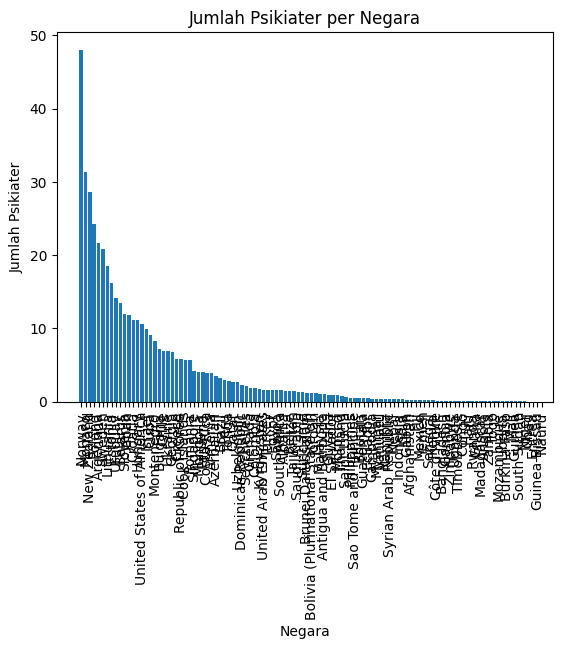

In [9]:
import matplotlib.pyplot as plt

# Mengambil data dari DataFrame
data = df3[['Country', 'Psychiatrists']]

# Mengurutkan data berdasarkan jumlah psikiater
sorted_data = data.sort_values('Psychiatrists', ascending=False)

# Membuat plot bar
plt.bar(sorted_data['Country'], sorted_data['Psychiatrists'])

# Menambahkan judul plot dan label sumbu
plt.title('Jumlah Psikiater per Negara')
plt.xlabel('Negara')
plt.ylabel('Jumlah Psikiater')

# Mengatur agar label sumbu x berada pada sudut 90 derajat
plt.xticks(rotation=90)

# Menampilkan plot
plt.show()


##### Menunjukkan jumlah psikolog di setiap negara pada setiap tahun.

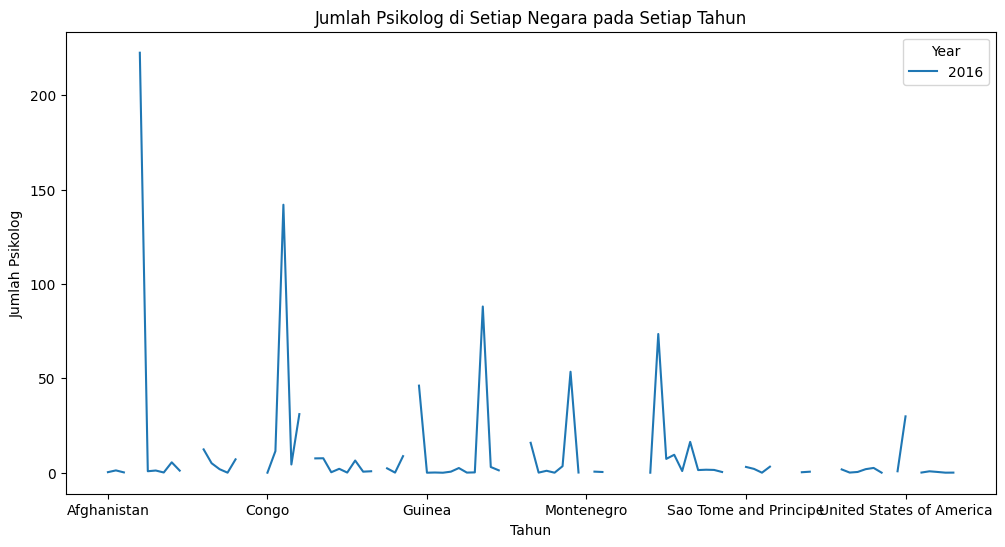

In [11]:
import matplotlib.pyplot as plt

# Memfilter data untuk hanya menampilkan kolom 'Country', 'Year', dan 'Psychologists'
df_psychologists = df3[['Country', 'Year', 'Psychologists']]

# Membuat pivot table dengan 'Country' sebagai indeks dan 'Year' sebagai kolom
df_psychologists_pivot = df_psychologists.pivot(index='Country', columns='Year', values='Psychologists')

# Membuat grafik garis untuk masing-masing negara
df_psychologists_pivot.plot(kind='line', figsize=(12,6))

# Menambahkan judul dan label sumbu
plt.title('Jumlah Psikolog di Setiap Negara pada Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Psikolog')

# Menampilkan grafik
plt.show()


 ### Menampilkan jumlah perawat yang tersedia di setiap negara pada setiap tahun

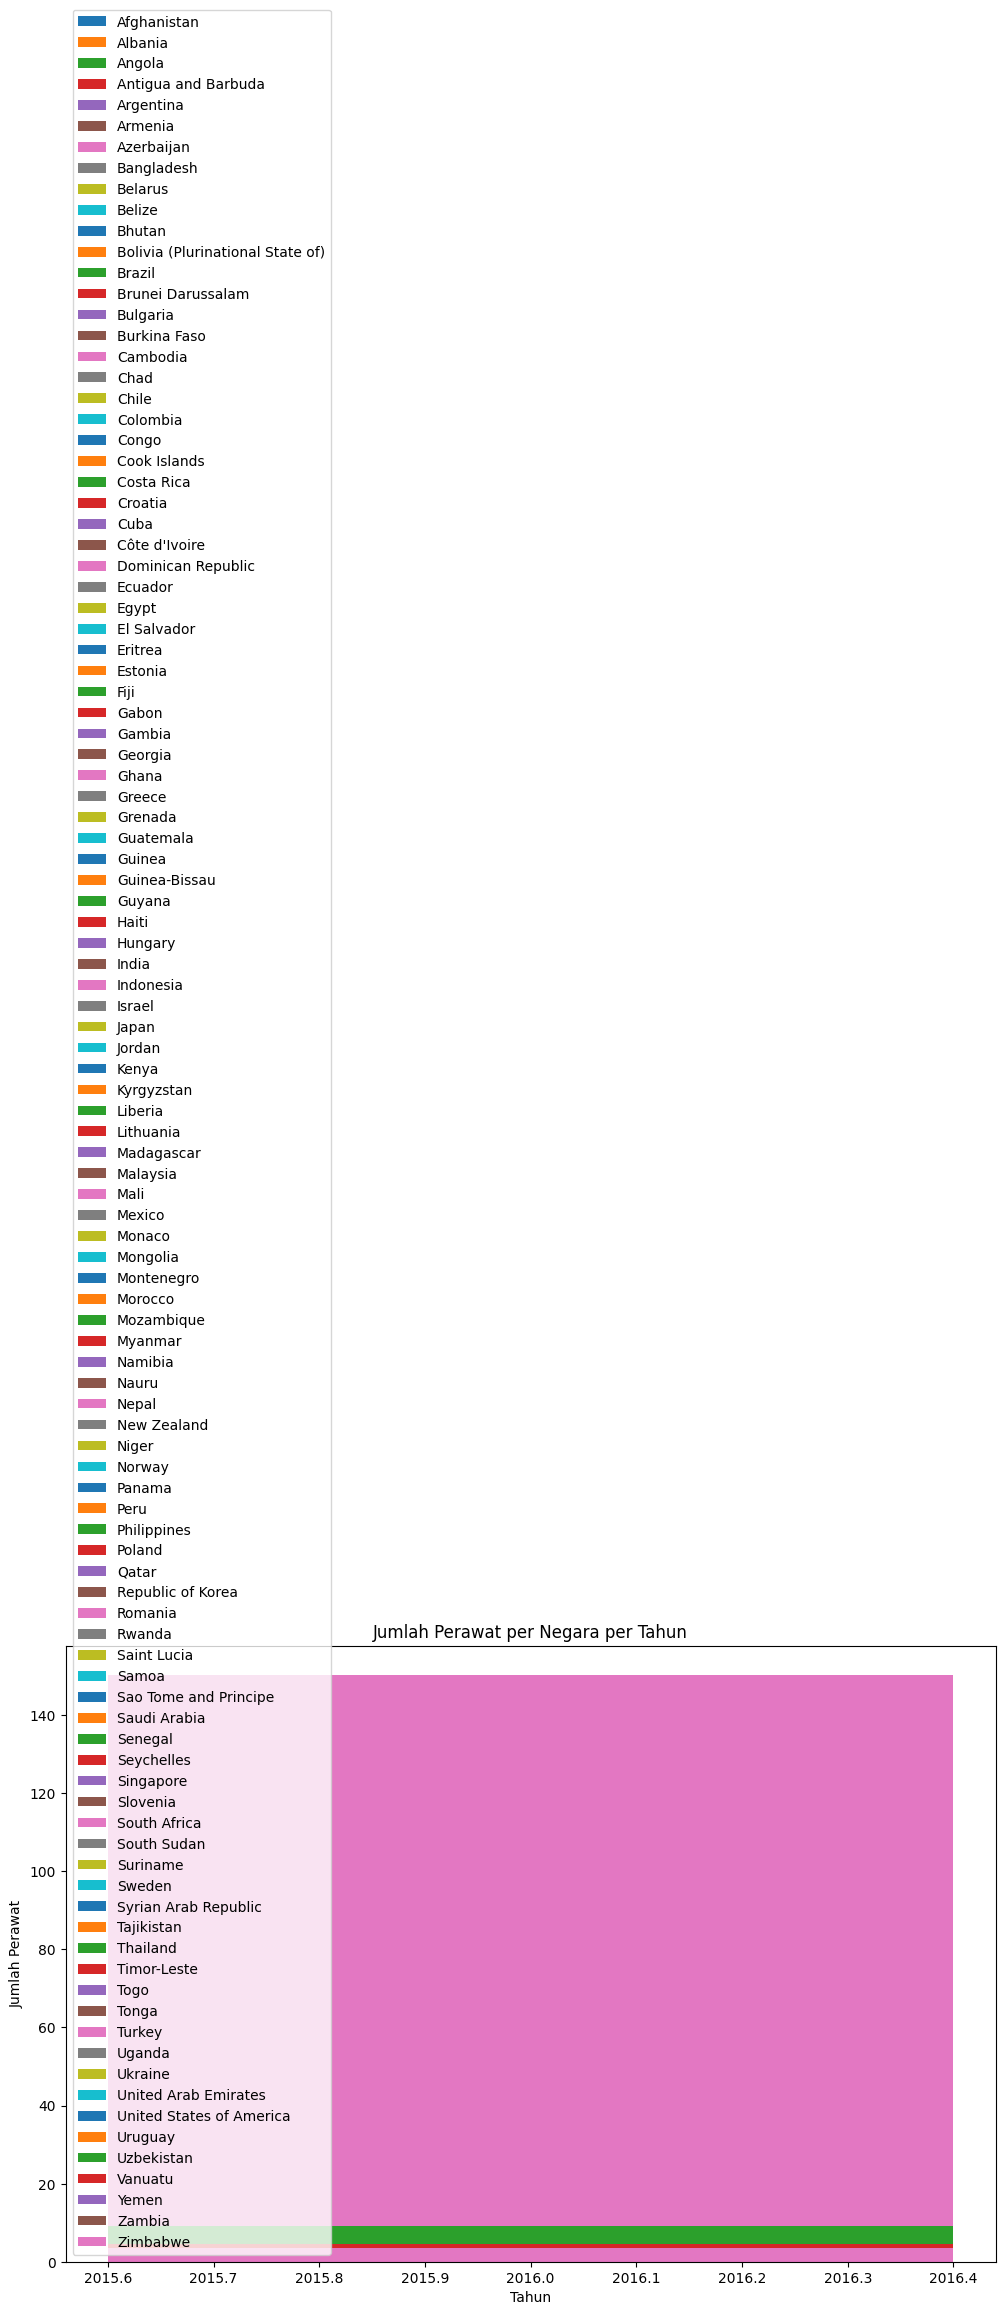

In [12]:
import matplotlib.pyplot as plt

# Mengambil data dari DataFrame
data = df3[['Country', 'Year', 'Nurses']]

# Mengelompokkan data berdasarkan negara dan tahun
grouped_data = data.groupby(['Country', 'Year']).sum().reset_index()

# Membuat plot bar untuk setiap negara
fig, ax = plt.subplots(figsize=(12, 8))
for country in grouped_data['Country'].unique():
    country_data = grouped_data[grouped_data['Country'] == country]
    ax.bar(country_data['Year'], country_data['Nurses'], label=country)

# Menambahkan judul plot dan label sumbu
plt.title('Jumlah Perawat per Negara per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Perawat')
plt.legend()

# Menampilkan plot
plt.show()

### Data Preparation

In [14]:
df3.isna().sum() 

Country            0
Year               0
Psychiatrists      3
Nurses            16
Social_workers    39
Psychologists     23
dtype: int64

###Cleaning

In [16]:
# Untuk membersihkan kolom-kolom dengan nilai null atau missing value, pada kolom Psychiatrists, Nurses, Social_workers, dan Psychologists
df3.dropna(subset=['Psychiatrists', 'Nurses', 'Social_workers', 'Psychologists'])
df3

,Country,Year,Psychiatrists,Nurses,Social_workers,Psychologists
0,Afghanistan,2016,0.231,0.098,NaN,0.296
1,Albania,2016,1.471,6.876,1.060,1.231
2,Angola,2016,0.057,0.660,0.022,0.179
3,Antigua and Barbuda,2016,1.001,7.005,4.003,NaN
4,Argentina,2016,21.705,NaN,NaN,222.572
...,...,...,...,...,...,...
102,Uzbekistan,2016,2.612,9.214,NaN,0.090
103,Vanuatu,2016,0.378,4.535,0.378,0.756
104,Yemen,2016,0.201,0.323,0.056,0.409
105,Zambia,2016,0.056,1.429,0.019,0.031
